## Небольшая ремарка

Изначально я хотел найти ещё какие-то интересные данные помимо температуры — например, распределение оценок фильмов критиками или распределение количества часов сна среди работников различных профессий, однако там возникали разные сложности и данные очень плохо вписывались в нормальное распределение, хотя по своей природе и сути они должны таковыми являться - видимо там было много сложных второстепенных факторов, да и самих данных не хватало в нужном количестве, чтобы можно было выявить что-то похожее на нормальное распределение. Поэтому я решил продолжить изучение и анализ температуры в городах с разных сторон света, мне показалась данная тематика очень интересной и полезной - и также, что важно, она имеет очень большой потенциал для разнообразного и многогранного анализа.

## Распаковка датасета

[Перейти на Kaggle](https://www.kaggle.com/datasets/guillemservera/global-daily-climate-data)

In [100]:
import pandas as pd

# Чтение Parquet-файла
df = pd.read_parquet('archive/daily_weather.parquet')

# Просмотр первых строк
print(df.head())


  station_id city_name       date  season  avg_temp_c  min_temp_c  max_temp_c  \
0      41515  Asadabad 1957-07-01  Summer        27.0        21.1        35.6   
1      41515  Asadabad 1957-07-02  Summer        22.8        18.9        32.2   
2      41515  Asadabad 1957-07-03  Summer        24.3        16.7        35.6   
3      41515  Asadabad 1957-07-04  Summer        26.6        16.1        37.8   
4      41515  Asadabad 1957-07-05  Summer        30.8        20.0        41.7   

   precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
0               0.0            NaN               NaN                 NaN   
1               0.0            NaN               NaN                 NaN   
2               1.0            NaN               NaN                 NaN   
3               4.1            NaN               NaN                 NaN   
4               0.0            NaN               NaN                 NaN   

   peak_wind_gust_kmh  avg_sea_level_pres_hpa  sunshine_

In [137]:
# Получаем уникальные значения городов
unique_cities = df['city_name'].unique()

# Преобразуем результат в список
unique_cities_list = unique_cities.tolist()

# Выводим уникальные города
print(unique_cities_list)

# Список городов, которые нужно проверить
cities_to_check = ['Reykjavik', 'Dubai', 'Tokyo', 'Yakutsk', 'Buenos Aires', 'Cape Town', 'Minneapolis', 'Fairbanks']

# Проверяем наличие каждого города в списке
for city in cities_to_check:
    if city in unique_cities_list:
        print(f"{city} есть в списке.")
    else:
        print(f"{city} нет в списке.")



['Asadabad', 'Fayzabad', 'Jalalabad', 'Kunduz', 'Qala i Naw', 'Sheberghan', 'Peshkopi', 'Shkodër', 'Tirana', 'Adrar', 'Algiers', 'Annaba', 'Batna', 'Biskra', 'Bordj Bou Arréridj', 'Béchar', 'Béjaïa', 'Constantine', 'Djelfa', 'Guelma', 'Jijel', 'Laghouat', "M'Sila", 'Mascara', 'Mostaganem', 'Médéa', 'Ouargla', 'Oum El Bouaghi', 'Saïda', 'Sidi Bel Abbès', 'Skikda', 'Sétif', 'Tiaret', 'Tizi Ouzou', 'Tlemcen', 'Tébessa', 'Pago Pago', 'Andorra la Vella', 'Cabinda', 'Luanda', 'Ondjiva', 'The Valley', "Saint John's", 'Buenos Aires', 'Corrientes', 'Córdoba', 'Formosa', 'La Plata', 'La Rioja', 'Mendoza', 'Neuquén', 'Paraná', 'Rawson', 'Resistencia', 'Río Gallegos', 'Salta', 'San Fernando del Valle de Catamarca', 'San Juan', 'San Luis', 'San Miguel de Tucumán', 'San Salvador de Jujuy', 'Santa Rosa', 'Ushuaia', 'Viedma', 'Ashtarak', 'Gavar', 'Gyumri', 'Ijevan', 'Yerevan', 'Oranjestad', 'Adelaide', 'Brisbane', 'Canberra', 'Darwin', 'Hobart', 'Melbourne', 'Perth', 'Sydney', 'Bregenz', 'Graz', 'Inns

Из интересных для изучения на погодные условия городов - в датасете имеются 5 из 8, тогда их и будем исследовать.

## Анализ данных разных городов

### Дубай

#### Анализ данных

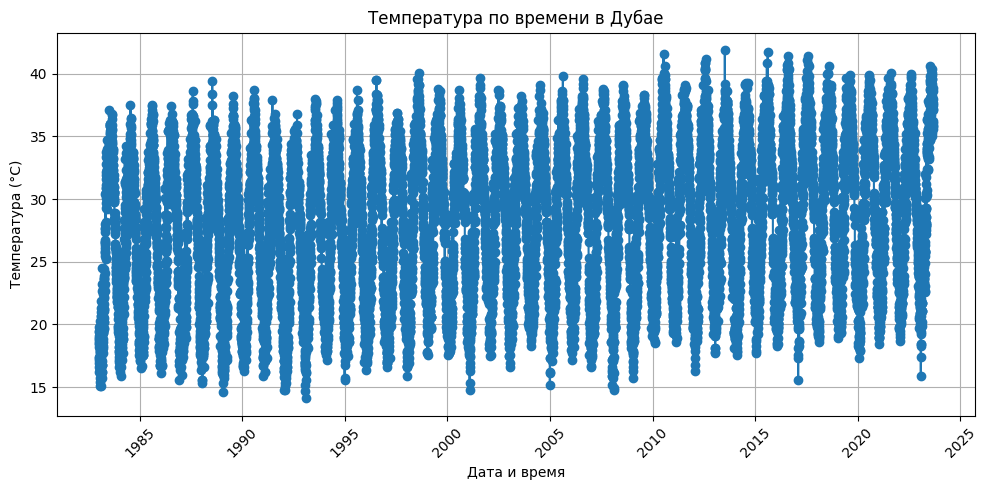

In [ ]:
import matplotlib.pyplot as plt

# Фильтрация данных по конкретному городу
city_name = 'Dubai'
filtered_df = df[df['city_name'] == city_name]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Дубае')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


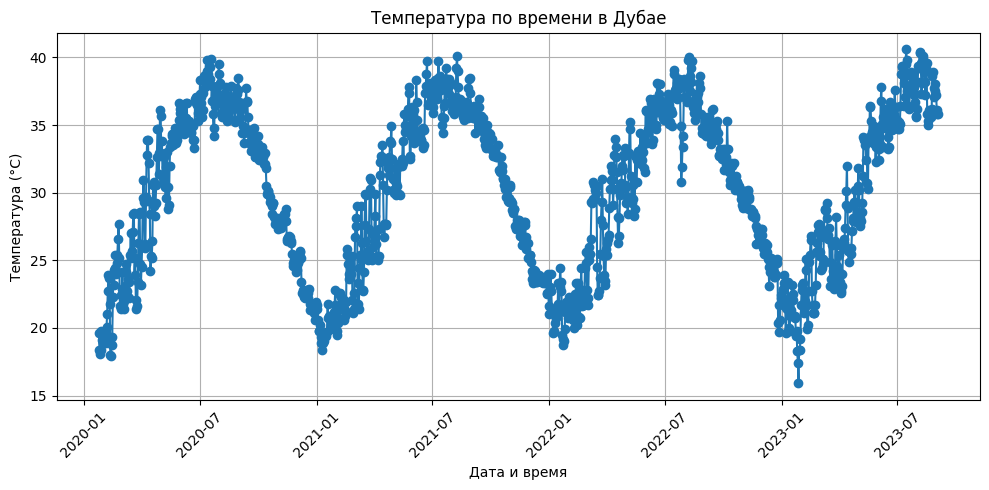

In [103]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Dubai'
start_date = '2020-01-25'  # Начальная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Дубае')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


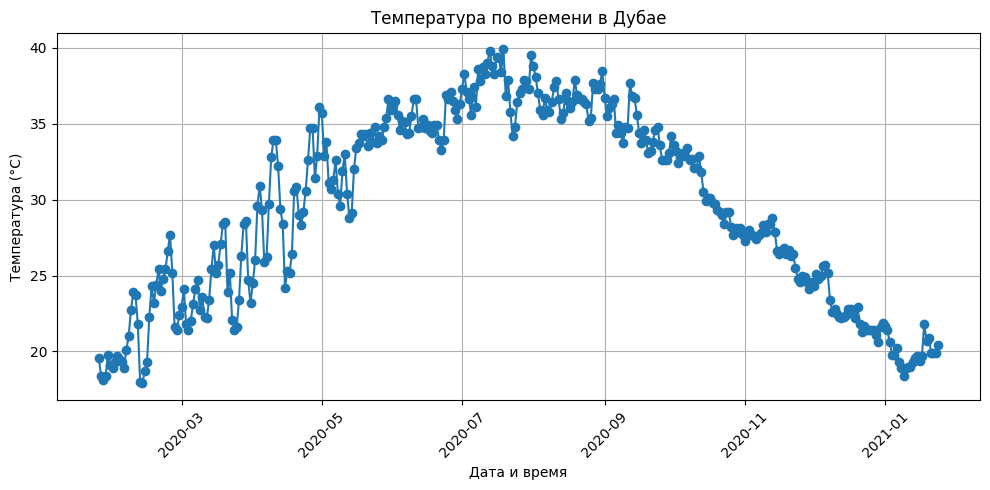

In [ ]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Dubai'
start_date = '2020-01-25'  # Начальная дата
end_date = '2021-01-25'  # Конечная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Дубае')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


In [105]:
# print(filtered_df.head())
print(filtered_df.shape)

(366, 14)


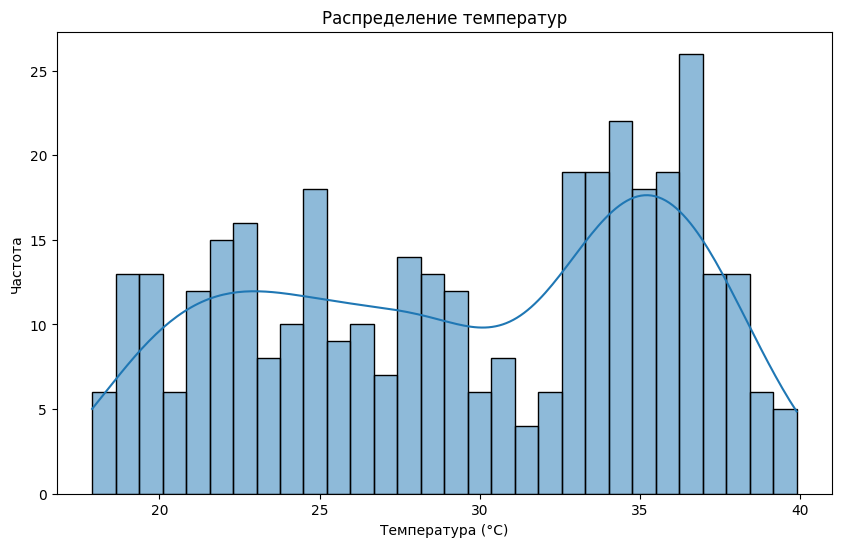

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_temp = filtered_df['avg_temp_c']

plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30)
plt.title('Распределение температур')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.show()


In [107]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Чтение Parquet-файла
df = pd.read_parquet('archive/daily_weather.parquet')

# Фильтрация данных по городу и диапазону дат
city_name = 'Dubai'
start_date = '2020-01-25'
end_date = '2021-01-25'

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация данных по выбранному городу и периоду
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Получение данных о средней температуре
avg_temp = filtered_df['avg_temp_c']

# Расчет необходимых статистик
mean_temp = np.mean(avg_temp)                  # Среднее (матожидание)
variance_temp = np.var(avg_temp)               # Дисперсия
std_dev_temp = np.sqrt(variance_temp)          # Среднеквадратичное отклонение
skewness_temp = skew(avg_temp)                 # Асимметрия
kurtosis_temp = kurtosis(avg_temp)             # Эксцесс
quantile_0_05 = np.quantile(avg_temp, 0.05)    # Квантиль 5%
quantile_0_95 = np.quantile(avg_temp, 0.95)    # Квантиль 95%
quantile_2_5 = np.quantile(avg_temp, 0.025)    # Точка на уровне 2.5%

# Вывод результатов
print(f"Математическое ожидание: {mean_temp:.2f}")
print(f"Дисперсия: {variance_temp:.2f}")
print(f"Среднеквадратичное отклонение: {std_dev_temp:.2f}")
print(f"Асимметрия: {skewness_temp:.2f}")
print(f"Эксцесс: {kurtosis_temp:.2f}")
print(f"Квантиль 5%: {quantile_0_05:.2f}")
print(f"Квантиль 95%: {quantile_0_95:.2f}")
print(f"Точка на уровне 2.5%: {quantile_2_5:.2f}")


Математическое ожидание: 29.47
Дисперсия: 38.76
Среднеквадратичное отклонение: 6.23
Асимметрия: -0.20
Эксцесс: -1.31
Квантиль 5%: 19.32
Квантиль 95%: 37.88
Точка на уровне 2.5%: 18.90


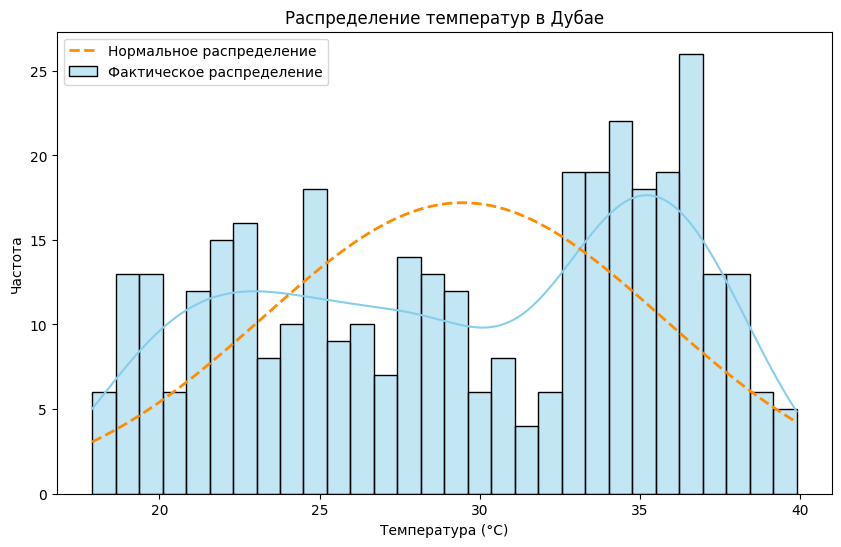

In [108]:
from scipy.stats import skew, kurtosis, norm

# Построение гистограммы фактических данных
plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30, color="skyblue", label="Фактическое распределение")

# Построение теоретического нормального распределения
x_values = np.linspace(avg_temp.min(), avg_temp.max(), 100)
pdf_values = norm.pdf(x_values, mean_temp, std_dev_temp)
plt.plot(x_values, pdf_values * len(avg_temp) * (avg_temp.max() - avg_temp.min()) / 30,  # масштабирование по количеству и ширине бин
         color="darkorange", linestyle="--", linewidth=2, label="Нормальное распределение")

# Настройка графика
plt.title('Распределение температур в Дубае')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.legend()
plt.show()

#### Описание результатов

Математическое ожидание 29.47°C указывает на высокую среднегодовую температуру. Дисперсия в 38.76°C и среднеквадратичное отклонение 6.23°C отражают значительные колебания температуры в течение года, что может свидетельствовать о заметных сезонных изменениях (с ярко выраженным жарким сезоном). Асимметрия -0.20 указывает на почти симметричное распределение температур, лишь с небольшим смещением влево, что указывает на слегка удлинённый "холодный" хвост. Низкий эксцесс -1.31 указывает на "плоское" распределение, с меньшим количеством экстремальных температурных значений по сравнению с нормальным распределением. Квантили 5% и 95% показывают, что 90% температур находятся в диапазоне от 19.32°C до 37.88°C, что отражает значительный диапазон значений. Поскольку 2.5%-й квантиль (18.90°C) близок к 5%-му (19.32°C), можно заключить, что самые низкие температуры довольно стабильны и имеют небольшие отклонения друг от друга.

### Токио

#### Анализ данных

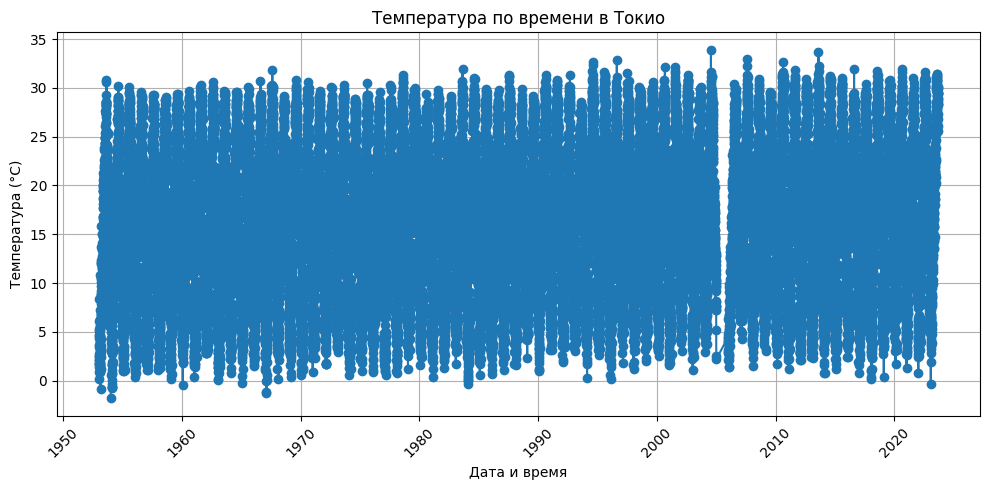

In [109]:
import matplotlib.pyplot as plt

# Фильтрация данных по конкретному городу
city_name = 'Tokyo'
filtered_df = df[df['city_name'] == city_name]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Токио')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


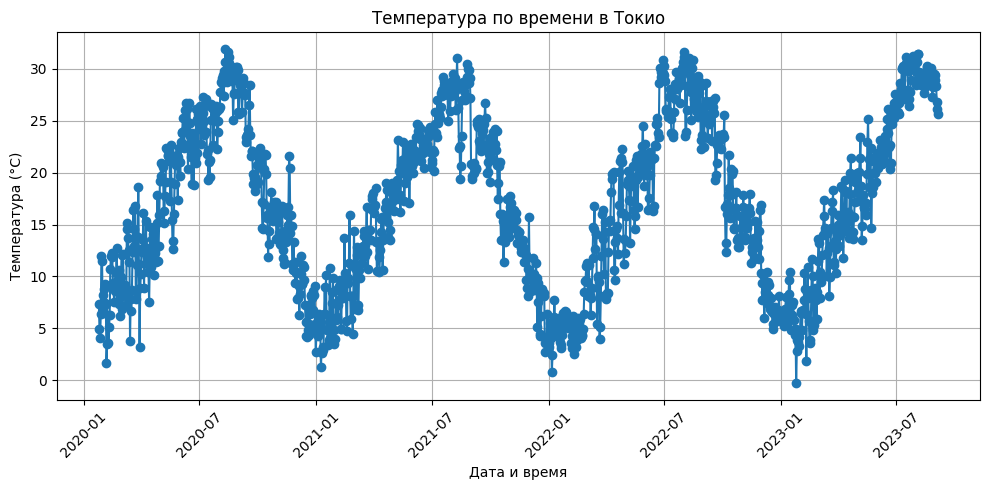

In [110]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Tokyo'
start_date = '2020-01-25'  # Начальная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Токио')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


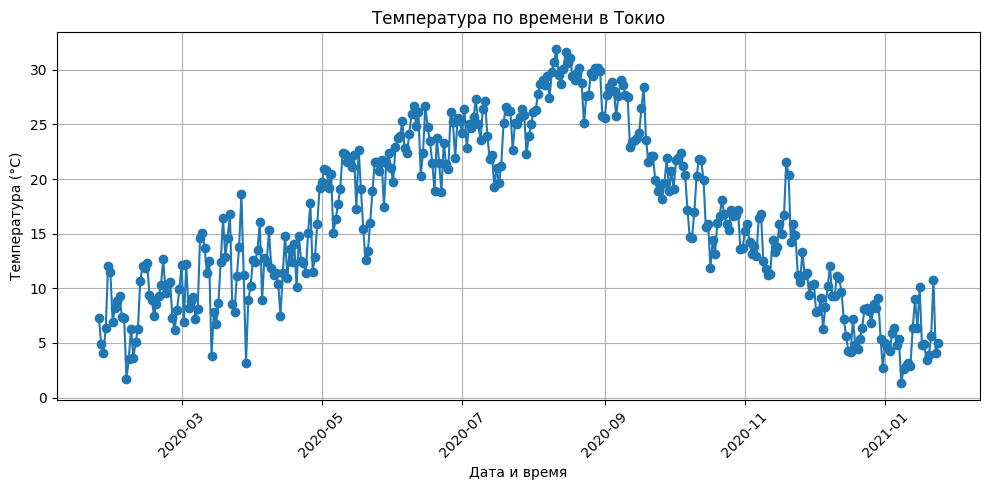

In [111]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Tokyo'
start_date = '2020-01-25'  # Начальная дата
end_date = '2021-01-25'  # Конечная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Токио')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


In [112]:
# print(filtered_df.head())
print(filtered_df.shape)

(366, 14)


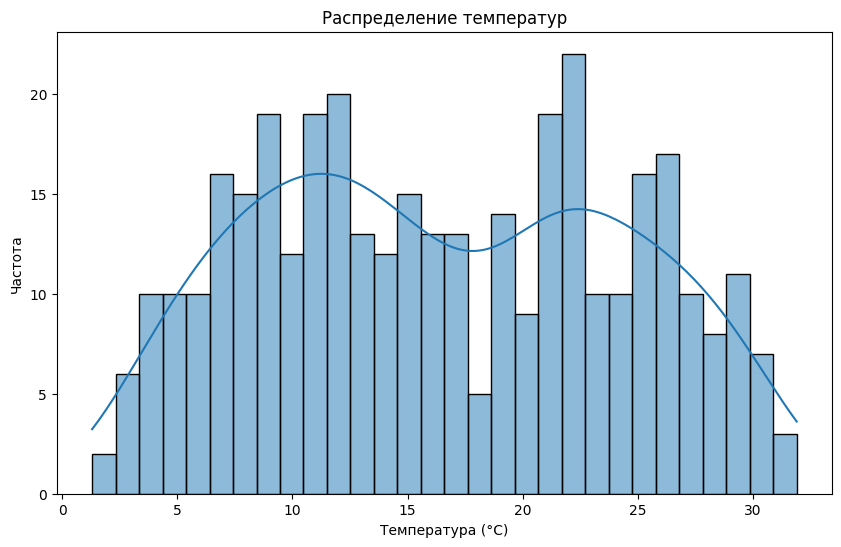

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_temp = filtered_df['avg_temp_c']

plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30)
plt.title('Распределение температур')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.show()


In [114]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Чтение Parquet-файла
df = pd.read_parquet('archive/daily_weather.parquet')

# Фильтрация данных по городу и диапазону дат
city_name = 'Tokyo'
start_date = '2020-01-25'
end_date = '2021-01-25'

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация данных по выбранному городу и периоду
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Получение данных о средней температуре
avg_temp = filtered_df['avg_temp_c']

# Расчет необходимых статистик
mean_temp = np.mean(avg_temp)                  # Среднее (матожидание)
variance_temp = np.var(avg_temp)               # Дисперсия
std_dev_temp = np.sqrt(variance_temp)          # Среднеквадратичное отклонение
skewness_temp = skew(avg_temp)                 # Асимметрия
kurtosis_temp = kurtosis(avg_temp)             # Эксцесс
quantile_0_05 = np.quantile(avg_temp, 0.05)    # Квантиль 5%
quantile_0_95 = np.quantile(avg_temp, 0.95)    # Квантиль 95%
quantile_2_5 = np.quantile(avg_temp, 0.025)    # Точка на уровне 2.5%

# Вывод результатов
print(f"Математическое ожидание: {mean_temp:.2f}")
print(f"Дисперсия: {variance_temp:.2f}")
print(f"Среднеквадратичное отклонение: {std_dev_temp:.2f}")
print(f"Асимметрия: {skewness_temp:.2f}")
print(f"Эксцесс: {kurtosis_temp:.2f}")
print(f"Квантиль 5%: {quantile_0_05:.2f}")
print(f"Квантиль 95%: {quantile_0_95:.2f}")
print(f"Точка на уровне 2.5%: {quantile_2_5:.2f}")


Математическое ожидание: 16.44
Дисперсия: 61.23
Среднеквадратичное отклонение: 7.82
Асимметрия: 0.08
Эксцесс: -1.13
Квантиль 5%: 4.45
Квантиль 95%: 29.10
Точка на уровне 2.5%: 3.51


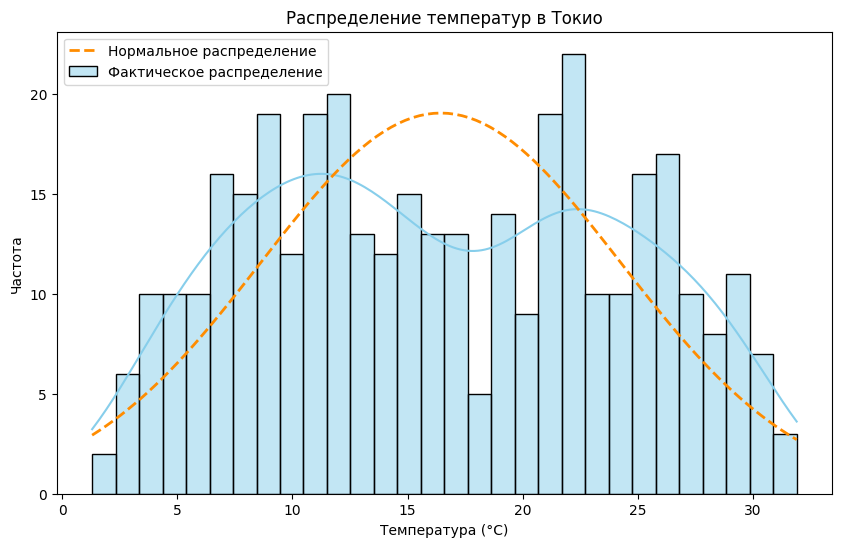

In [115]:
from scipy.stats import skew, kurtosis, norm

# Построение гистограммы фактических данных
plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30, color="skyblue", label="Фактическое распределение")

# Построение теоретического нормального распределения
x_values = np.linspace(avg_temp.min(), avg_temp.max(), 100)
pdf_values = norm.pdf(x_values, mean_temp, std_dev_temp)
plt.plot(x_values, pdf_values * len(avg_temp) * (avg_temp.max() - avg_temp.min()) / 30,  # масштабирование по количеству и ширине бин
         color="darkorange", linestyle="--", linewidth=2, label="Нормальное распределение")

# Настройка графика
plt.title('Распределение температур в Токио')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.legend()
plt.show()

#### Описание результатов

Математическое ожидание в 16.44°C указывает на умеренную среднегодовую температуру. Дисперсия в 61.23°C и среднеквадратичное отклонение в 7.82°C отражают значительные колебания температур в течение года, что может говорить о выраженных сезонных изменениях (весна и осень). Асимметрия, равная 0.08, показывает, что распределение температур практически симметрично, лишь с незначительным смещением вправо, что указывает на слегка удлиненный "тёплый" хвост. Низкий эксцесс -1.13 указывает на "плоское" распределение с меньшим количеством экстремальных температур, чем в нормальном распределении. Квантили 5% и 95% показывают, что 90% температурных значений находятся в диапазоне от 4.45°C до 29.10°C, указывая на значительный диапазон. Поскольку 2.5%-й квантиль (3.51°C) близок к 5%-му (4.45°C), можно заключить, что самые низкие температуры стабильны и не сильно отличаются друг от друга.

### Якутск

#### Анализ данных

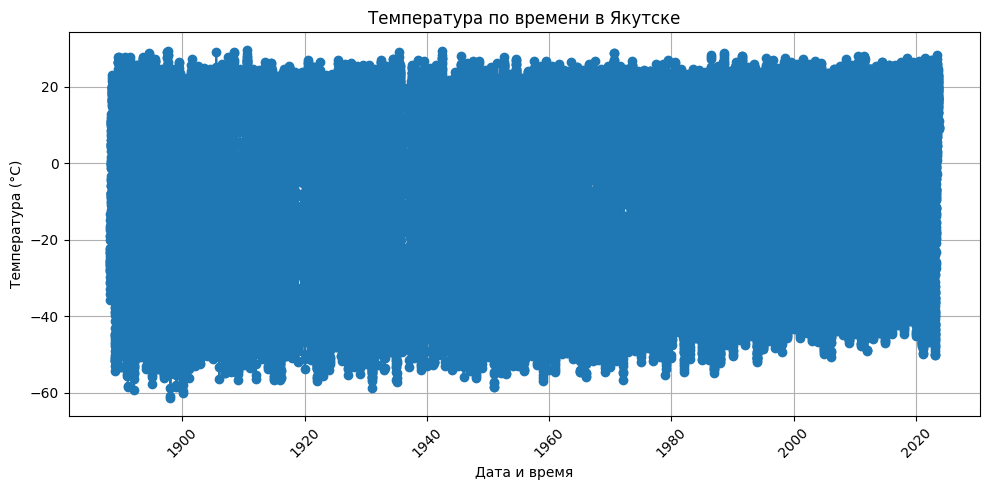

In [116]:
import matplotlib.pyplot as plt

# Фильтрация данных по конкретному городу
city_name = 'Yakutsk'
filtered_df = df[df['city_name'] == city_name]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Якутске')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()

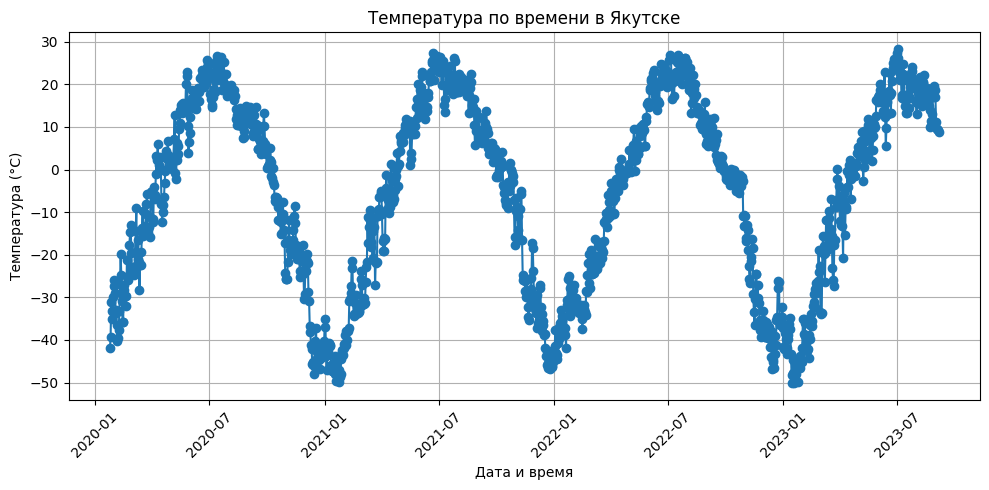

In [117]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Yakutsk'
start_date = '2020-01-25'  # Начальная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Якутске')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()

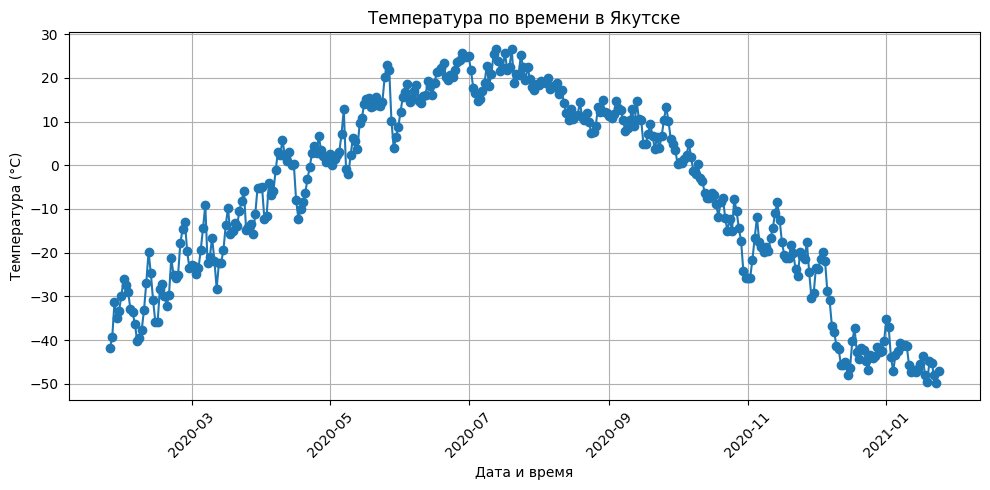

In [118]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Yakutsk'
start_date = '2020-01-25'  # Начальная дата
end_date = '2021-01-25'  # Конечная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Якутске')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()


In [119]:
# print(filtered_df.head())
print(filtered_df.shape)

(366, 14)


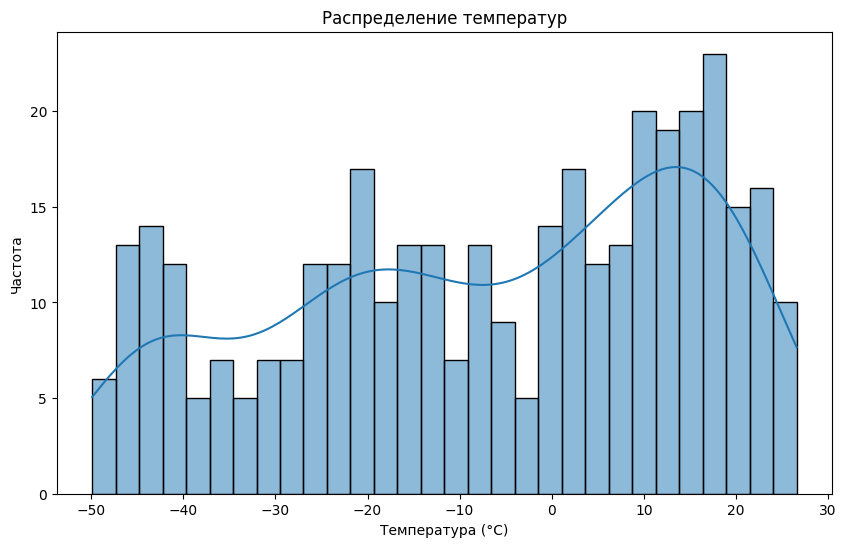

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_temp = filtered_df['avg_temp_c']

plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30)
plt.title('Распределение температур')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.show()

In [121]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Чтение Parquet-файла
df = pd.read_parquet('archive/daily_weather.parquet')

# Фильтрация данных по городу и диапазону дат
city_name = 'Yakutsk'
start_date = '2020-01-25'
end_date = '2021-01-25'

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация данных по выбранному городу и периоду
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Получение данных о средней температуре
avg_temp = filtered_df['avg_temp_c']

# Расчет необходимых статистик
mean_temp = np.mean(avg_temp)                  # Среднее (матожидание)
variance_temp = np.var(avg_temp)               # Дисперсия
std_dev_temp = np.sqrt(variance_temp)          # Среднеквадратичное отклонение
skewness_temp = skew(avg_temp)                 # Асимметрия
kurtosis_temp = kurtosis(avg_temp)             # Эксцесс
quantile_0_05 = np.quantile(avg_temp, 0.05)    # Квантиль 5%
quantile_0_95 = np.quantile(avg_temp, 0.95)    # Квантиль 95%
quantile_2_5 = np.quantile(avg_temp, 0.025)    # Точка на уровне 2.5%

# Вывод результатов
print(f"Математическое ожидание: {mean_temp:.2f}")
print(f"Дисперсия: {variance_temp:.2f}")
print(f"Среднеквадратичное отклонение: {std_dev_temp:.2f}")
print(f"Асимметрия: {skewness_temp:.2f}")
print(f"Эксцесс: {kurtosis_temp:.2f}")
print(f"Квантиль 5%: {quantile_0_05:.2f}")
print(f"Квантиль 95%: {quantile_0_95:.2f}")
print(f"Точка на уровне 2.5%: {quantile_2_5:.2f}")

Математическое ожидание: -6.75
Дисперсия: 482.59
Среднеквадратичное отклонение: 21.97
Асимметрия: -0.34
Эксцесс: -1.12
Квантиль 5%: -45.02
Квантиль 95%: 22.20
Точка на уровне 2.5%: -46.89


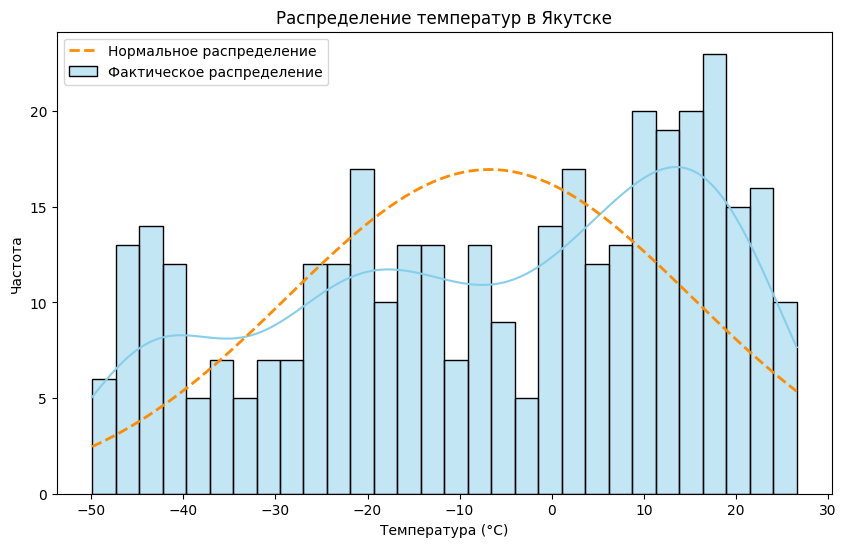

In [122]:
from scipy.stats import skew, kurtosis, norm

# Построение гистограммы фактических данных
plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30, color="skyblue", label="Фактическое распределение")

# Построение теоретического нормального распределения
x_values = np.linspace(avg_temp.min(), avg_temp.max(), 100)
pdf_values = norm.pdf(x_values, mean_temp, std_dev_temp)
plt.plot(x_values, pdf_values * len(avg_temp) * (avg_temp.max() - avg_temp.min()) / 30,  # масштабирование по количеству и ширине бин
         color="darkorange", linestyle="--", linewidth=2, label="Нормальное распределение")

# Настройка графика
plt.title('Распределение температур в Якутске')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.legend()
plt.show()

#### Описание результатов

Математическое ожидание -6.75°C указывает на довольно низкую среднегодовую температуру. Дисперсия в 482.59°C и среднеквадратичное отклонение в 21.97°C отражают очень большие колебания температур, что может свидетельствовать о сильных сезонных изменениях, вероятно, выраженных холодной зимой и более мягким летом. Асимметрия -0.34 указывает на небольшое смещение распределения влево, что говорит о немного удлинённом "холодном" хвосте. Низкий эксцесс -1.12 предполагает "плоское" распределение, то есть экстремально высокие или низкие значения встречаются реже, чем в нормальном распределении. Квантили 5% и 95% показывают, что 90% всех температур находятся в диапазоне от -45.02°C до 22.20°C, отражая очень широкий температурный диапазон. Поскольку 2.5%-й квантиль (-46.89°C) близок к 5%-му (-45.02°C), можно сделать вывод, что самые низкие температуры довольно стабильны и имеют небольшие отклонения друг от друга.

### Буэнос-Айрес

#### Анализ данных

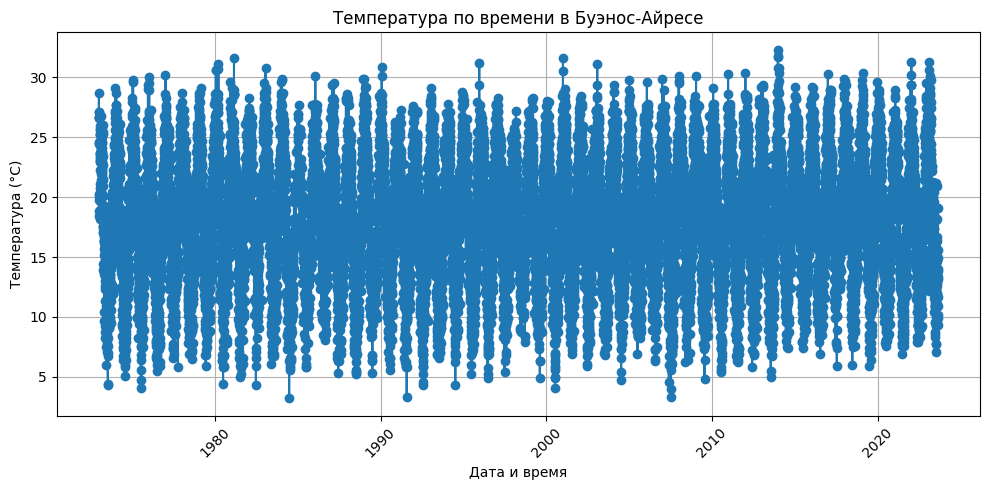

In [123]:
import matplotlib.pyplot as plt

# Фильтрация данных по конкретному городу
city_name = 'Buenos Aires'
filtered_df = df[df['city_name'] == city_name]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Буэнос-Айресе')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()

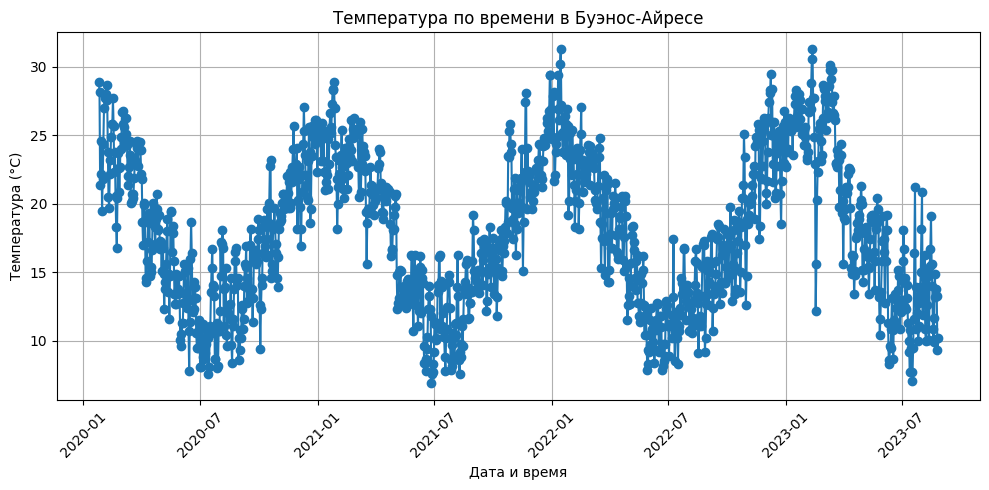

In [124]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Buenos Aires'
start_date = '2020-01-25'  # Начальная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Буэнос-Айресе')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()

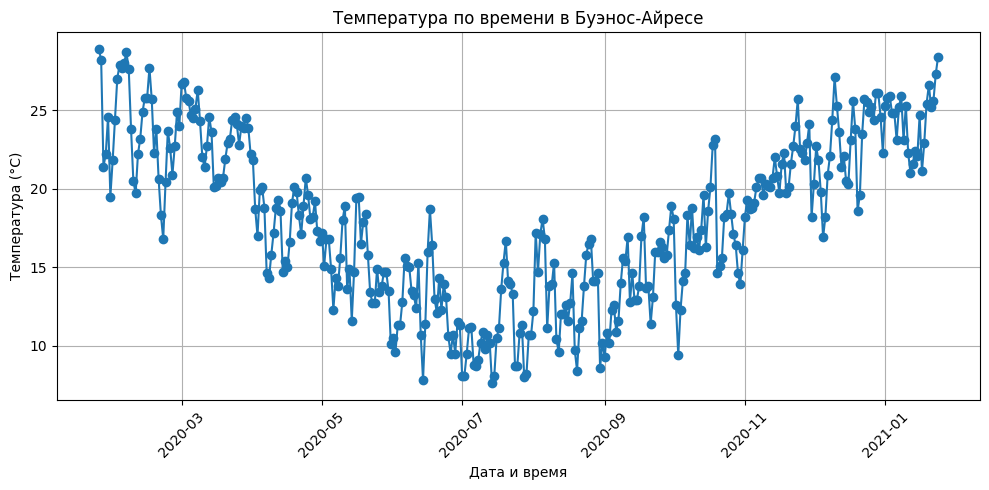

In [125]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Buenos Aires'
start_date = '2020-01-25'  # Начальная дата
end_date = '2021-01-25'  # Конечная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Буэнос-Айресе')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()

In [126]:
# print(filtered_df.head())
print(filtered_df.shape)

(366, 14)


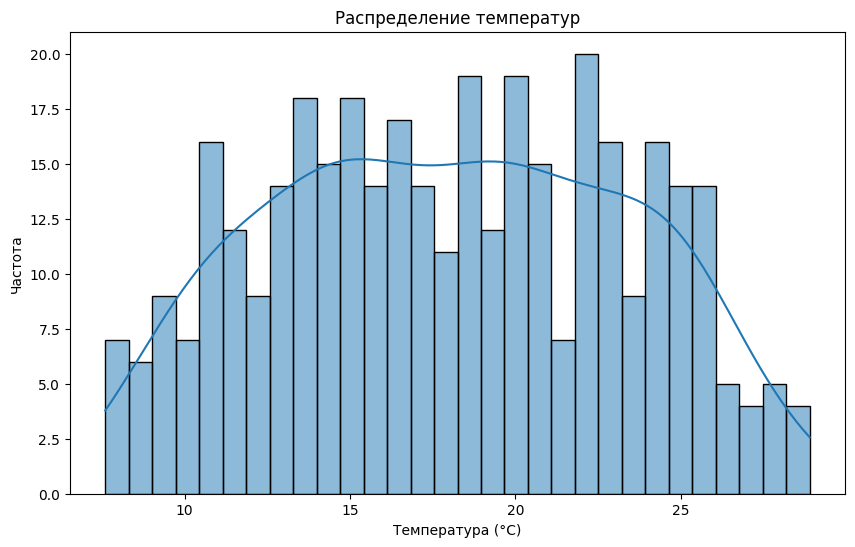

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_temp = filtered_df['avg_temp_c']

plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30)
plt.title('Распределение температур')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.show()

In [128]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Чтение Parquet-файла
df = pd.read_parquet('archive/daily_weather.parquet')

# Фильтрация данных по городу и диапазону дат
city_name = 'Buenos Aires'
start_date = '2020-01-25'
end_date = '2021-01-25'

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация данных по выбранному городу и периоду
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Получение данных о средней температуре
avg_temp = filtered_df['avg_temp_c']

# Расчет необходимых статистик
mean_temp = np.mean(avg_temp)                  # Среднее (матожидание)
variance_temp = np.var(avg_temp)               # Дисперсия
std_dev_temp = np.sqrt(variance_temp)          # Среднеквадратичное отклонение
skewness_temp = skew(avg_temp)                 # Асимметрия
kurtosis_temp = kurtosis(avg_temp)             # Эксцесс
quantile_0_05 = np.quantile(avg_temp, 0.05)    # Квантиль 5%
quantile_0_95 = np.quantile(avg_temp, 0.95)    # Квантиль 95%
quantile_2_5 = np.quantile(avg_temp, 0.025)    # Точка на уровне 2.5%

# Вывод результатов
print(f"Математическое ожидание: {mean_temp:.2f}")
print(f"Дисперсия: {variance_temp:.2f}")
print(f"Среднеквадратичное отклонение: {std_dev_temp:.2f}")
print(f"Асимметрия: {skewness_temp:.2f}")
print(f"Эксцесс: {kurtosis_temp:.2f}")
print(f"Квантиль 5%: {quantile_0_05:.2f}")
print(f"Квантиль 95%: {quantile_0_95:.2f}")
print(f"Точка на уровне 2.5%: {quantile_2_5:.2f}")

Математическое ожидание: 17.98
Дисперсия: 27.98
Среднеквадратичное отклонение: 5.29
Асимметрия: 0.00
Эксцесс: -1.01
Квантиль 5%: 9.53
Квантиль 95%: 25.90
Точка на уровне 2.5%: 8.70


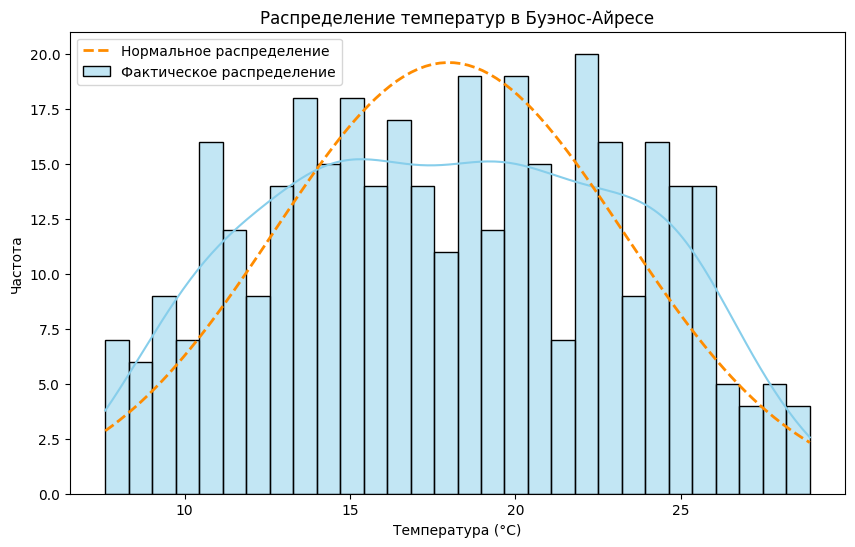

In [129]:
from scipy.stats import skew, kurtosis, norm

# Построение гистограммы фактических данных
plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30, color="skyblue", label="Фактическое распределение")

# Построение теоретического нормального распределения
x_values = np.linspace(avg_temp.min(), avg_temp.max(), 100)
pdf_values = norm.pdf(x_values, mean_temp, std_dev_temp)
plt.plot(x_values, pdf_values * len(avg_temp) * (avg_temp.max() - avg_temp.min()) / 30,  # масштабирование по количеству и ширине бин
         color="darkorange", linestyle="--", linewidth=2, label="Нормальное распределение")

# Настройка графика
plt.title('Распределение температур в Буэнос-Айресе')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.legend()
plt.show()

#### Описание результатов

Математическое ожидание 17.98°C указывает на умеренную среднегодовую температуру. Дисперсия в 27.98°C и среднеквадратичное отклонение в 5.29°C отражают умеренные колебания температуры, что может свидетельствовать о более сглаженных сезонных изменениях (без резких перепадов между временами года). Нулевая асимметрия (0.00) указывает на симметричное распределение температур, без ярко выраженного смещения в какую-либо сторону. Низкий эксцесс -1.01 указывает на "плоское" распределение, то есть экстремально высокие или низкие значения встречаются реже, чем в нормальном распределении. Квантили 5% и 95% показывают, что 90% температур находятся в диапазоне от 9.53°C до 25.90°C, что отражает относительно стабильный температурный диапазон. Поскольку 2.5%-й квантиль (8.70°C) близок к 5%-му (9.53°C), можно заключить, что самые низкие температуры стабильны и не отличаются значительными отклонениями.

### Кейптаун

#### Анализ данных

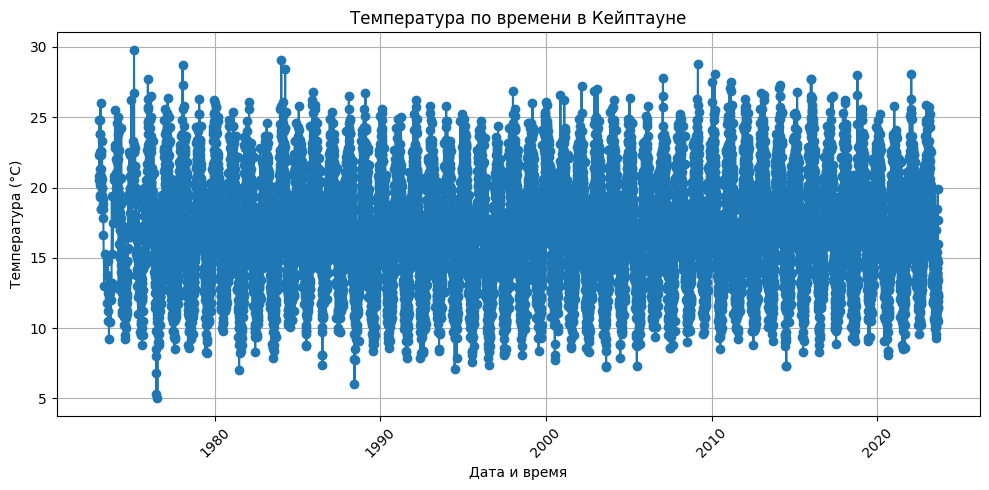

In [130]:
import matplotlib.pyplot as plt

# Фильтрация данных по конкретному городу
city_name = 'Cape Town'
filtered_df = df[df['city_name'] == city_name]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Кейптауне')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()

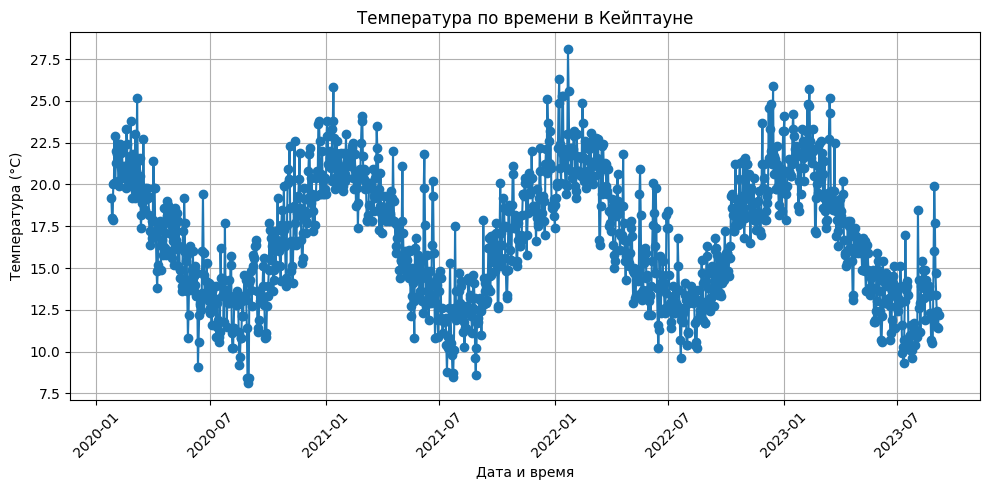

In [131]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Cape Town'
start_date = '2020-01-25'  # Начальная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Кейптауне')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()

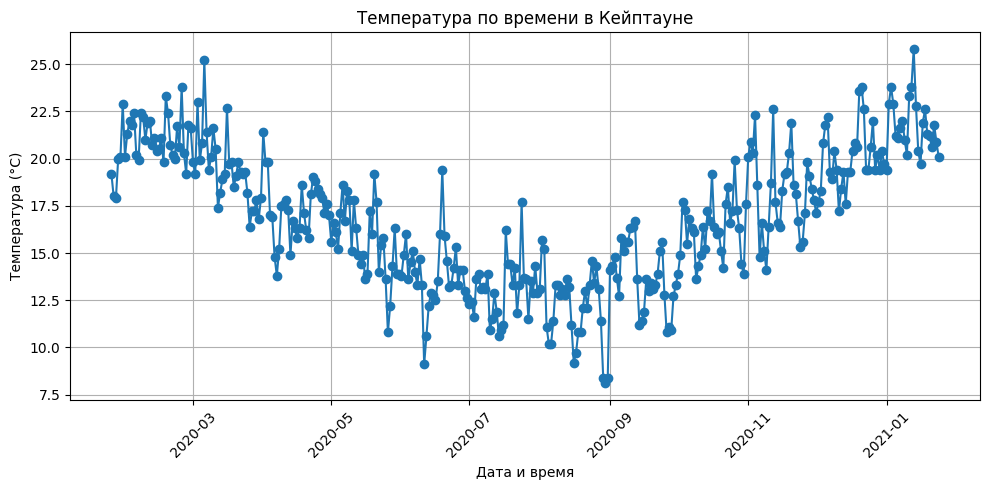

In [132]:
import matplotlib.pyplot as plt

# Фильтрация данных по городу и диапазону дат
city_name = 'Cape Town'
start_date = '2020-01-25'  # Начальная дата
end_date = '2021-01-25'  # Конечная дата

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация DataFrame
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Установка графика
plt.figure(figsize=(10, 5))

# Построение графика
plt.plot(filtered_df['date'], filtered_df['avg_temp_c'], marker='o', linestyle='-')

# Настройка графика
plt.title('Температура по времени в Кейптауне')
plt.xlabel('Дата и время')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)  # Поворот меток по оси X
plt.grid()

# Показ графика
plt.tight_layout()  # Упрощает отображение
plt.show()

In [133]:
# print(filtered_df.head())
print(filtered_df.shape)

(366, 14)


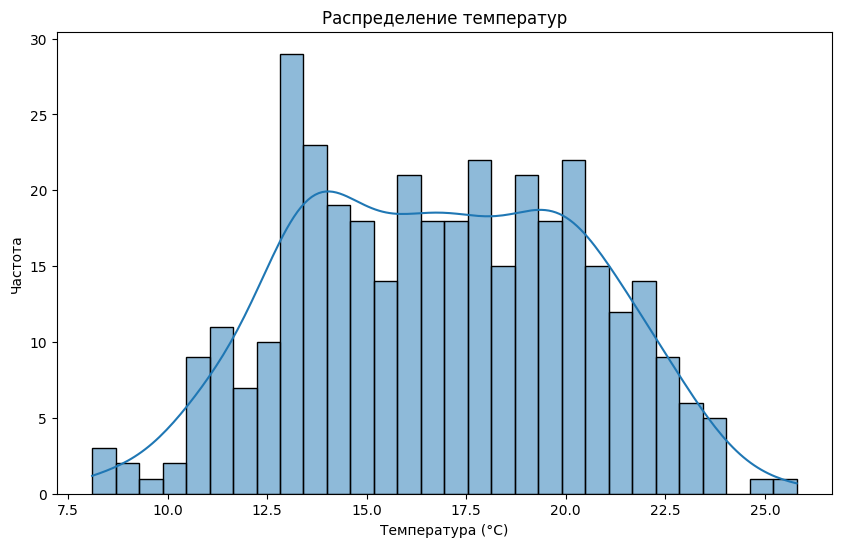

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_temp = filtered_df['avg_temp_c']

plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30)
plt.title('Распределение температур')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.show()

In [135]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Чтение Parquet-файла
df = pd.read_parquet('archive/daily_weather.parquet')

# Фильтрация данных по городу и диапазону дат
city_name = 'Cape Town'
start_date = '2020-01-25'
end_date = '2021-01-25'

# Преобразование строки в datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Фильтрация данных по выбранному городу и периоду
filtered_df = df[(df['city_name'] == city_name) & (df['date'] >= start_date) & (df['date'] < end_date)]

# Получение данных о средней температуре
avg_temp = filtered_df['avg_temp_c']

# Расчет необходимых статистик
mean_temp = np.mean(avg_temp)                  # Среднее (матожидание)
variance_temp = np.var(avg_temp)               # Дисперсия
std_dev_temp = np.sqrt(variance_temp)          # Среднеквадратичное отклонение
skewness_temp = skew(avg_temp)                 # Асимметрия
kurtosis_temp = kurtosis(avg_temp)             # Эксцесс
quantile_0_05 = np.quantile(avg_temp, 0.05)    # Квантиль 5%
quantile_0_95 = np.quantile(avg_temp, 0.95)    # Квантиль 95%
quantile_2_5 = np.quantile(avg_temp, 0.025)    # Точка на уровне 2.5%

# Вывод результатов
print(f"Математическое ожидание: {mean_temp:.2f}")
print(f"Дисперсия: {variance_temp:.2f}")
print(f"Среднеквадратичное отклонение: {std_dev_temp:.2f}")
print(f"Асимметрия: {skewness_temp:.2f}")
print(f"Эксцесс: {kurtosis_temp:.2f}")
print(f"Квантиль 5%: {quantile_0_05:.2f}")
print(f"Квантиль 95%: {quantile_0_95:.2f}")
print(f"Точка на уровне 2.5%: {quantile_2_5:.2f}")

Математическое ожидание: 16.82
Дисперсия: 12.68
Среднеквадратичное отклонение: 3.56
Асимметрия: -0.00
Эксцесс: -0.77
Квантиль 5%: 11.12
Квантиль 95%: 22.40
Точка на уровне 2.5%: 10.62


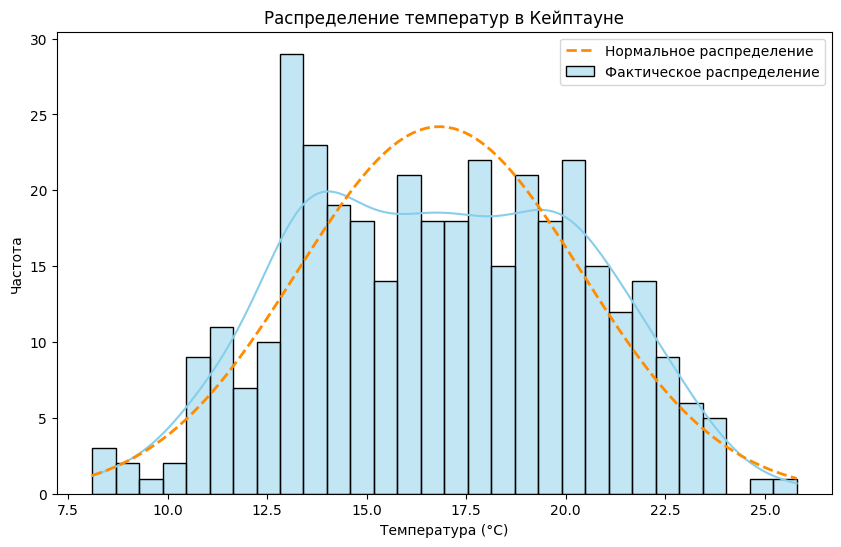

In [136]:
from scipy.stats import skew, kurtosis, norm

# Построение гистограммы фактических данных
plt.figure(figsize=(10, 6))
sns.histplot(avg_temp, kde=True, bins=30, color="skyblue", label="Фактическое распределение")

# Построение теоретического нормального распределения
x_values = np.linspace(avg_temp.min(), avg_temp.max(), 100)
pdf_values = norm.pdf(x_values, mean_temp, std_dev_temp)
plt.plot(x_values, pdf_values * len(avg_temp) * (avg_temp.max() - avg_temp.min()) / 30,  # масштабирование по количеству и ширине бин
         color="darkorange", linestyle="--", linewidth=2, label="Нормальное распределение")

# Настройка графика
plt.title('Распределение температур в Кейптауне')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.legend()
plt.show()

#### Описание результатов

Математическое ожидание 16.82°C указывает на умеренную среднегодовую температуру. Дисперсия в 12.68°C и среднеквадратичное отклонение в 3.56°C отражают сдержанные колебания температуры, что может свидетельствовать о сглаженных сезонных изменениях без значительных перепадов. Нулевая асимметрия (-0.00) указывает на симметричное распределение температур, без смещения в какую-либо сторону. Низкий эксцесс -0.77 указывает на "плоское" распределение, где экстремально высокие или низкие значения встречаются реже, чем в нормальном распределении. Квантили 5% и 95% показывают, что 90% значений температуры находятся в диапазоне от 11.12°C до 22.40°C, отражая устойчивый и сравнительно узкий температурный диапазон. Поскольку 2.5%-й квантиль (10.62°C) близок к 5%-му (11.12°C), можно заключить, что самые низкие температуры стабильны и имеют небольшие отклонения друг от друга.